In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/20250410_butler_full_20221201-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_5.zip,104536158,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.327777,2025-04-09 23:13:09.714558,2025-04-09 23:13:10.042335
1,collated_12.zip,109380704,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.141633,2025-04-09 23:13:09.873989,2025-04-09 23:13:10.015622
2,collated_16.zip,106923682,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.276410,2025-04-09 23:13:09.902654,2025-04-09 23:13:10.179064
3,collated_3.zip,128838382,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.142693,2025-04-09 23:13:10.043688,2025-04-09 23:13:10.186381
4,collated_8.zip,105144610,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.053315,2025-04-09 23:13:12.097649,2025-04-09 23:13:12.150964
...,...,...,...,...,...,...
47977,collated_72707.zip,137277524,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.186332,2025-04-10 09:31:16.091507,2025-04-10 09:31:16.277839
47978,collated_69931.zip,140371818,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.311116,2025-04-10 09:32:03.237570,2025-04-10 09:32:03.548686
47979,collated_72718.zip,139253248,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.216428,2025-04-10 09:32:52.343097,2025-04-10 09:32:52.559525
47980,collated_72712.zip,137277556,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.204518,2025-04-10 09:34:21.707145,2025-04-10 09:34:21.911663


In [3]:
df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']
df[df['OVERLAP'] == False]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
0,collated_5.zip,104536158,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.327777,2025-04-09 23:13:09.714558,2025-04-09 23:13:10.042335,False
4,collated_8.zip,105144610,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.053315,2025-04-09 23:13:12.097649,2025-04-09 23:13:12.150964,False
5,collated_13.zip,131732002,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.104818,2025-04-09 23:13:12.463404,2025-04-09 23:13:12.568222,False
6,collated_18.zip,99009832,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.115934,2025-04-09 23:13:12.850064,2025-04-09 23:13:12.965998,False
7,collated_10.zip,110751202,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.288853,2025-04-09 23:13:15.455538,2025-04-09 23:13:15.744391,False
...,...,...,...,...,...,...,...
47977,collated_72707.zip,137277524,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.186332,2025-04-10 09:31:16.091507,2025-04-10 09:31:16.277839,False
47978,collated_69931.zip,140371818,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.311116,2025-04-10 09:32:03.237570,2025-04-10 09:32:03.548686,False
47979,collated_72718.zip,139253248,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.216428,2025-04-10 09:32:52.343097,2025-04-10 09:32:52.559525,False
47980,collated_72712.zip,137277556,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.204518,2025-04-10 09:34:21.707145,2025-04-10 09:34:21.911663,False


In [4]:
df['FILES_PER_ZIP'] = len(df['ZIP_CONTENTS'].iloc[0].split(',')) if df['ZIP_CONTENTS'].iloc[0] else 0
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP
0,collated_5.zip,104536158,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.327777,2025-04-09 23:13:09.714558,2025-04-09 23:13:10.042335,False,2
1,collated_12.zip,109380704,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.141633,2025-04-09 23:13:09.873989,2025-04-09 23:13:10.015622,True,2
2,collated_16.zip,106923682,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.276410,2025-04-09 23:13:09.902654,2025-04-09 23:13:10.179064,True,2
3,collated_3.zip,128838382,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.142693,2025-04-09 23:13:10.043688,2025-04-09 23:13:10.186381,True,2
4,collated_8.zip,105144610,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.053315,2025-04-09 23:13:12.097649,2025-04-09 23:13:12.150964,False,2
...,...,...,...,...,...,...,...,...
47977,collated_72707.zip,137277524,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.186332,2025-04-10 09:31:16.091507,2025-04-10 09:31:16.277839,False,2
47978,collated_69931.zip,140371818,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.311116,2025-04-10 09:32:03.237570,2025-04-10 09:32:03.548686,False,2
47979,collated_72718.zip,139253248,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.216428,2025-04-10 09:32:52.343097,2025-04-10 09:32:52.559525,False,2
47980,collated_72712.zip,137277556,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.204518,2025-04-10 09:34:21.707145,2025-04-10 09:34:21.911663,False,2


In [5]:
df['TYPE'] = df['LOCAL_PATH'].apply(lambda x: 'zip' if x.endswith('.zip') else 'file')
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP,TYPE
0,collated_5.zip,104536158,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.327777,2025-04-09 23:13:09.714558,2025-04-09 23:13:10.042335,False,2,zip
1,collated_12.zip,109380704,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.141633,2025-04-09 23:13:09.873989,2025-04-09 23:13:10.015622,True,2,zip
2,collated_16.zip,106923682,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.276410,2025-04-09 23:13:09.902654,2025-04-09 23:13:10.179064,True,2,zip
3,collated_3.zip,128838382,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.142693,2025-04-09 23:13:10.043688,2025-04-09 23:13:10.186381,True,2,zip
4,collated_8.zip,105144610,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.053315,2025-04-09 23:13:12.097649,2025-04-09 23:13:12.150964,False,2,zip
...,...,...,...,...,...,...,...,...,...
47977,collated_72707.zip,137277524,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.186332,2025-04-10 09:31:16.091507,2025-04-10 09:31:16.277839,False,2,zip
47978,collated_69931.zip,140371818,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.311116,2025-04-10 09:32:03.237570,2025-04-10 09:32:03.548686,False,2,zip
47979,collated_72718.zip,139253248,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.216428,2025-04-10 09:32:52.343097,2025-04-10 09:32:52.559525,False,2,zip
47980,collated_72712.zip,137277556,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.204518,2025-04-10 09:34:21.707145,2025-04-10 09:34:21.911663,False,2,zip


In [6]:
len(df[df['TYPE'] == 'zip']), len(df[df['TYPE'] == 'file'])

(47982, 0)

In [7]:
zip_upload_time = df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum()
zip_upload_time

5639.294147

In [8]:
print(f"Total upload time for zip files: {zip_upload_time} seconds")
print(f"Average upload time for zip files: {zip_upload_time / len(df[df['TYPE'] == 'zip'])} seconds")

Total upload time for zip files: 5639.294147 seconds
Average upload time for zip files: 0.1175293682422575 seconds


In [9]:
zip_total_size = df[df['TYPE'] == 'zip']['FILE_SIZE'].sum()
zip_total_size / (1024 * 1024 * 1024)

5030.2479780958965

In [10]:
print(f"Total zip file size: {zip_total_size / (1024**3)} GiB")
print(f"Average zip file size: {zip_total_size / len(df[df['TYPE'] == 'zip']) / 1024**3} GiB")

Total zip file size: 5030.2479780958965 GiB
Average zip file size: 0.1048361464319098 GiB


In [11]:
df['TRANSFER_RATE'] = df['FILE_SIZE'] / df['UPLOAD_TIME'] * 8 / (1024**3)
df['TRANSFER_RATE'].describe()

count    47982.000000
mean        11.721758
std          7.967076
min          0.011337
25%          5.796143
50%          9.530738
75%         15.701367
max         60.809032
Name: TRANSFER_RATE, dtype: float64

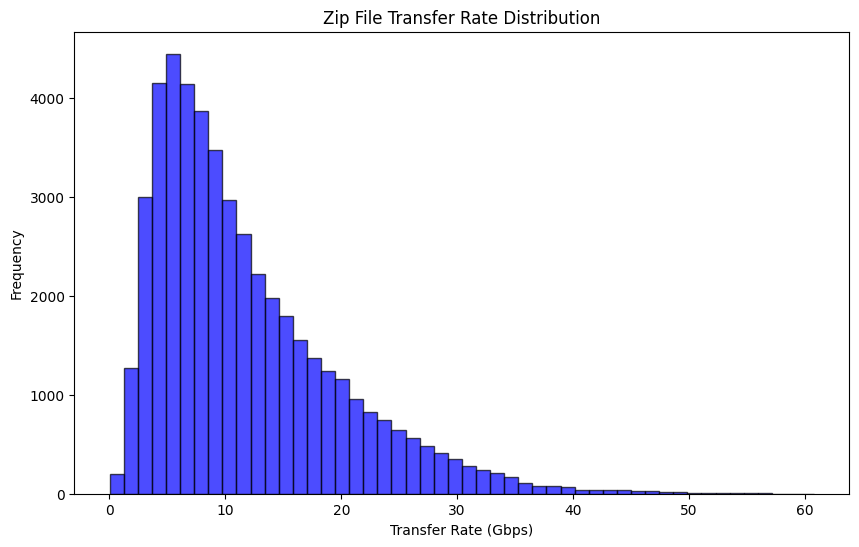

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

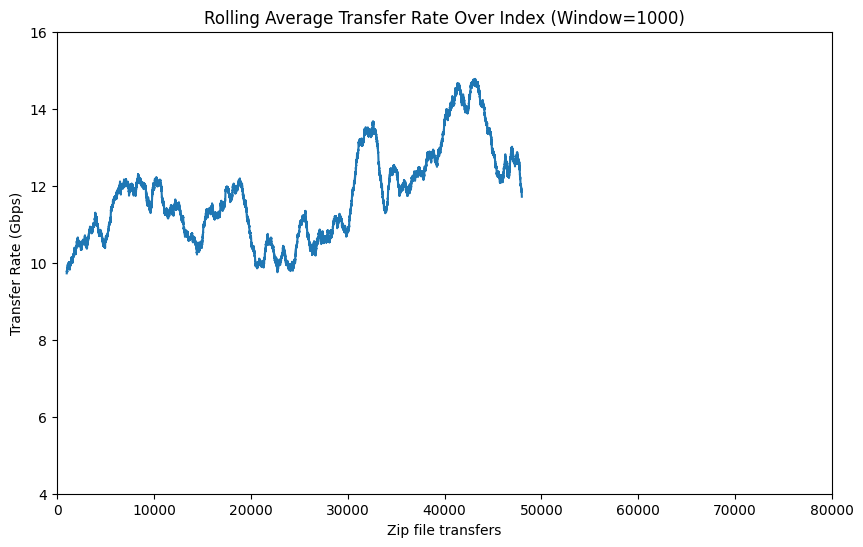

In [13]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'zip']['TRANSFER_RATE'].rolling(window=1000).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
plt.xlim(0,80000)
plt.ylim(4, 16)
plt.xlabel('Zip file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

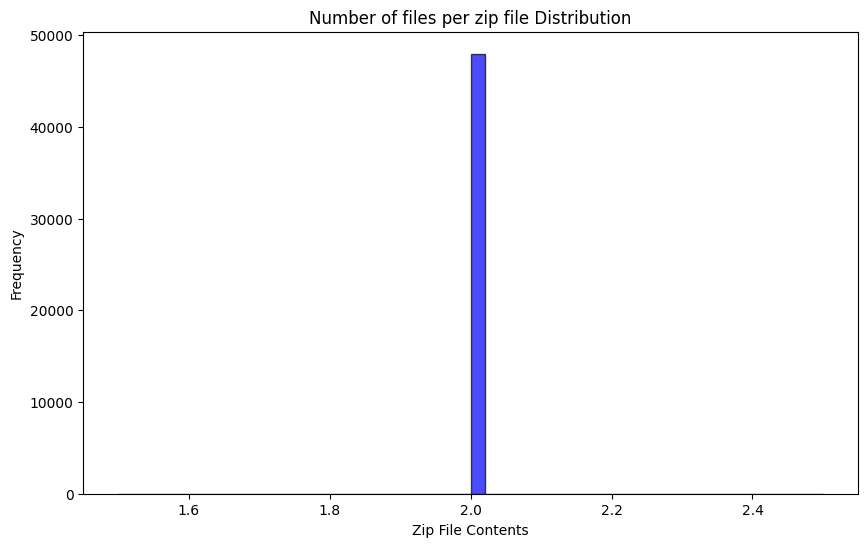

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILES_PER_ZIP'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Number of files per zip file Distribution')
plt.xlabel('Zip File Contents')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
df[df['TRANSFER_RATE'] > 20].sort_values(by='TRANSFER_RATE', ascending=False).head(100)

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,FILES_PER_ZIP,TYPE,TRANSFER_RATE
35955,collated_54458.zip,129296862,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.015842,2025-04-10 06:10:06.814312,2025-04-10 06:10:06.830154,False,2,zip,60.809032
10757,collated_18710.zip,133588110,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.017342,2025-04-10 01:31:05.944983,2025-04-10 01:31:05.962325,False,2,zip,57.392975
32108,collated_50665.zip,133648000,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.017726,2025-04-10 05:35:50.735639,2025-04-10 05:35:50.753365,False,2,zip,56.174839
18140,collated_25159.zip,128700766,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.017116,2025-04-10 03:01:39.949292,2025-04-10 03:01:39.966408,False,2,zip,56.023337
29207,collated_44065.zip,132927256,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.017688,2025-04-10 05:09:06.452202,2025-04-10 05:09:06.469890,False,2,zip,55.991929
...,...,...,...,...,...,...,...,...,...,...
47872,collated_72162.zip,133616414,data/u/ir-shir1/DRP/vikingCoaddDetect/20230110...,0.021329,2025-04-10 09:19:27.776767,2025-04-10 09:19:27.798096,False,2,zip,46.674474
26041,collated_38800.zip,121186260,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.019352,2025-04-10 04:34:52.859603,2025-04-10 04:34:52.878955,False,2,zip,46.657090
25839,collated_40802.zip,119559064,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.019130,2025-04-10 04:32:43.061293,2025-04-10 04:32:43.080423,True,2,zip,46.564791
12198,collated_20558.zip,121333188,data/u/ir-shir1/DRP/vikingCoaddDetect/20230104...,0.019438,2025-04-10 01:49:30.478745,2025-04-10 01:49:30.498183,False,2,zip,46.506981
